# 76. Minimum Window Substring

## Description:

Given two strings s and t of lengths m and n respectively, return the minimum window 
substring
 of s such that every character in t (including duplicates) is included in the window. If there is no such substring, return the empty string "".

The testcases will be generated such that the answer is unique.

## Examples:

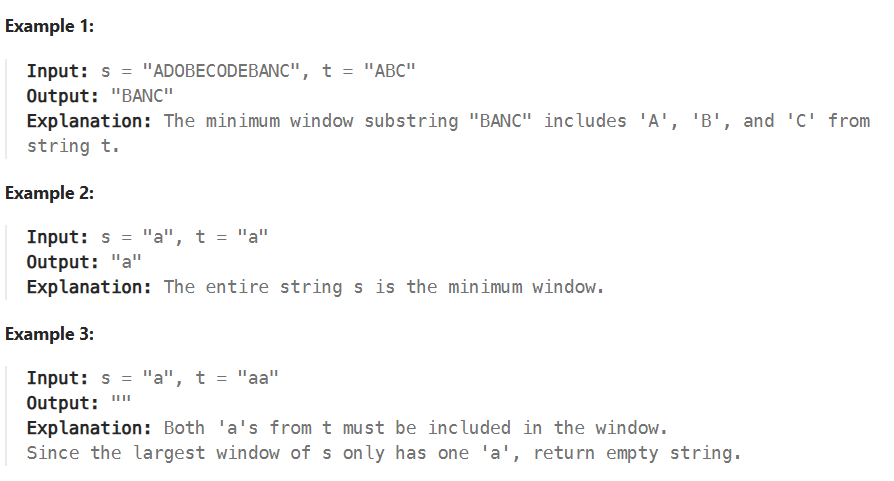

## Constraints:

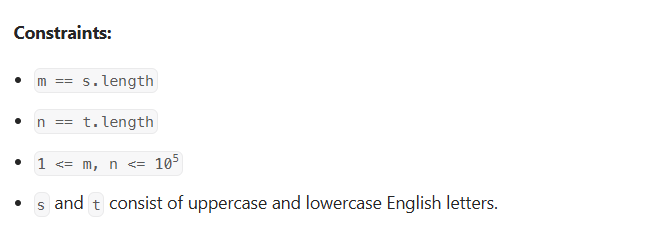

## Solutions:

There are multiple solutions exists here we will discuss some of the solutions one by one.

#### 1. Brute Force

In [2]:
class Solution:
    def minWindow(self, s: str, t: str) -> str:
        if t == "":
            return ""

        countT = {}
        for c in t:
            countT[c] = 1 + countT.get(c, 0)

        res, resLen = [-1, -1], float("infinity")
        for i in range(len(s)):
            countS = {}
            for j in range(i, len(s)):
                countS[s[j]] = 1 + countS.get(s[j], 0)

                flag = True
                for c in countT:
                    if countT[c] > countS.get(c, 0):
                        flag = False
                        break
                
                if flag and (j - i + 1) < resLen:
                    resLen = j - i + 1
                    res = [i, j]

        l, r = res
        return s[l : r + 1] if resLen != float("infinity") else ""

Time complexity: O(n^2)
Space complexity: O(m)
Where n is the length of the string s and m is the total number of unique characters in the strings t and 
s
s.

#### 2. Sliding Window:

In [1]:
class Solution:
    def minWindow(self, s: str, t: str) -> str:
        if t == "":
            return ""

        countT, window = {}, {}
        for c in t:
            countT[c] = 1 + countT.get(c, 0)

        have, need = 0, len(countT)
        res, resLen = [-1, -1], float("infinity")
        l = 0
        for r in range(len(s)):
            c = s[r]
            window[c] = 1 + window.get(c, 0)

            if c in countT and window[c] == countT[c]:
                have += 1

            while have == need:
                if (r - l + 1) < resLen:
                    res = [l, r]
                    resLen = r - l + 1
                    
                window[s[l]] -= 1
                if s[l] in countT and window[s[l]] < countT[s[l]]:
                    have -= 1
                l += 1
        l, r = res
        return s[l : r + 1] if resLen != float("infinity") else ""

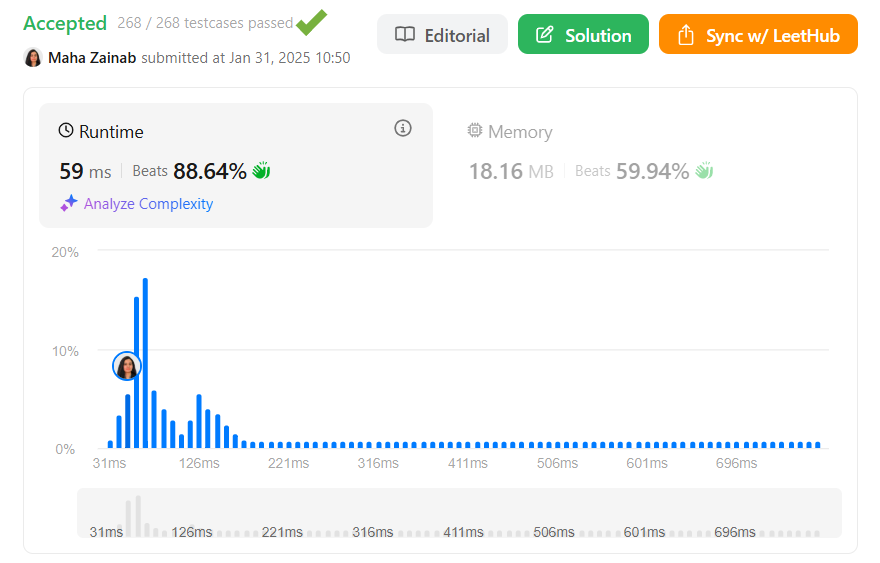